## 讀檔案，載入資料

In [6]:
import json
def load_json(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        return {item['cuisine_id']: item for item in json.load(f)}

gt_file = 'ground_truth.json'
gpt_file = 'response_gpt.json'
gemini_file = 'response_gemini.json'
claude_file = 'response_claude.json'

gt_data = load_json(gt_file)
gpt_data = load_json(gpt_file)
gemini_data = load_json(gemini_file)
claude_data = load_json(claude_file)

print(gt_data)
print(gpt_data)
print(gemini_data)
print(claude_data)

{1: {'cuisine_id': 1, 'cuisine_url': 'https://icook.tw/recipes/455986', 'cuisine_name': '滷肉飯', 'ingredients': [{'ingredient': '五花肉', 'amount': '2000', 'unit': '克'}, {'ingredient': '洋蔥', 'amount': '2', 'unit': '顆'}, {'ingredient': '紅蔥頭末', 'amount': '50', 'unit': '克'}, {'ingredient': '蒜末', 'amount': '50', 'unit': '克'}, {'ingredient': '五香粉', 'amount': '1', 'unit': '小匙'}, {'ingredient': '醬油', 'amount': '1', 'unit': '杯'}, {'ingredient': '油膏', 'amount': '0.5', 'unit': '杯'}, {'ingredient': '紹興酒', 'amount': '4', 'unit': '大匙'}, {'ingredient': '冰糖', 'amount': '50', 'unit': '克'}], 'cooking_instructions': '洋蔥切絲或丁。五花肉切細條。大蒜壓成泥或切末。紅蔥頭可以用紅蔥酥代替。先放部分的肉下鍋煎出油來。肉取出備用。將砂糖或冰糖下鍋，用煎肉的油炒至咖啡色。大約深金黃色就可以先熄火了。加入醬油，油膏。加入蒜泥、五香粉、洋蔥與加入紹興酒拌勻同煮，沒有紹興也可以加米酒。加入所有的五花肉拌炒均勻。加入800ml的水。開大火煮滾，改中小火煮兩個小時。', 'quantity': 10}, 2: {'cuisine_id': 2, 'cuisine_url': 'https://icook.tw/recipes/391516', 'cuisine_name': '滷肉飯', 'ingredients': [{'ingredient': '豬五花肉', 'amount': '1000', 'unit': '克'}, {'ingredient': '蒜頭', 'amount': '3', 'unit': '

## 資料整理

### ingredients 變成 sentence 

In [7]:
# {id:" ", ing:" "}
gt_ing_sentence_dic = {}
gpt_ing_sentence_dic = {}
gemini_ing_sentence_dic = {}
claude_ing_sentence_dic = {}

def ingredients_to_sentence (data):
    ing_sentence = {}
    for item in data:
        sentence = ""
        for ingredient_list in data[item]['ingredients']:
            sentence = sentence + ingredient_list['ingredient'] + " "
        ing_sentence[item] = sentence
    return ing_sentence

gt_ing_sentence_dic = ingredients_to_sentence(gt_data)
gpt_ing_sentence_dic = ingredients_to_sentence(gpt_data)
gemini_ing_sentence_dic = ingredients_to_sentence(gemini_data)
claude_ing_sentence_dic = ingredients_to_sentence(claude_data)

### Instruction 變成 sentence

In [8]:
# {id:" ", instrc:" "}
gt_instrc_sentence_dic = {}
gpt_instrc_sentence_dic = {}
gemini_instrc_sentence_dic = {}
claude_instrc_sentence_dic = {}

def instructions_to_sentence (data):
    print(data)
    instrc_sentence = {}
    for item in data:
        print(data[item]['cooking_instructions'])
        instrc_sentence[item] = data[item]['cooking_instructions']
    return instrc_sentence

gt_instrc_sentence_dic = instructions_to_sentence(gt_data)
gpt_instrc_sentence_dic = instructions_to_sentence(gpt_data)
gemini_instrc_sentence_dic = instructions_to_sentence(gemini_data)
claude_instrc_sentence_dic = instructions_to_sentence(claude_data)


{1: {'cuisine_id': 1, 'cuisine_url': 'https://icook.tw/recipes/455986', 'cuisine_name': '滷肉飯', 'ingredients': [{'ingredient': '五花肉', 'amount': '2000', 'unit': '克'}, {'ingredient': '洋蔥', 'amount': '2', 'unit': '顆'}, {'ingredient': '紅蔥頭末', 'amount': '50', 'unit': '克'}, {'ingredient': '蒜末', 'amount': '50', 'unit': '克'}, {'ingredient': '五香粉', 'amount': '1', 'unit': '小匙'}, {'ingredient': '醬油', 'amount': '1', 'unit': '杯'}, {'ingredient': '油膏', 'amount': '0.5', 'unit': '杯'}, {'ingredient': '紹興酒', 'amount': '4', 'unit': '大匙'}, {'ingredient': '冰糖', 'amount': '50', 'unit': '克'}], 'cooking_instructions': '洋蔥切絲或丁。五花肉切細條。大蒜壓成泥或切末。紅蔥頭可以用紅蔥酥代替。先放部分的肉下鍋煎出油來。肉取出備用。將砂糖或冰糖下鍋，用煎肉的油炒至咖啡色。大約深金黃色就可以先熄火了。加入醬油，油膏。加入蒜泥、五香粉、洋蔥與加入紹興酒拌勻同煮，沒有紹興也可以加米酒。加入所有的五花肉拌炒均勻。加入800ml的水。開大火煮滾，改中小火煮兩個小時。', 'quantity': 10}, 2: {'cuisine_id': 2, 'cuisine_url': 'https://icook.tw/recipes/391516', 'cuisine_name': '滷肉飯', 'ingredients': [{'ingredient': '豬五花肉', 'amount': '1000', 'unit': '克'}, {'ingredient': '蒜頭', 'amount': '3', 'unit': '

## 食材種類正確性

### BERTscore

In [9]:
from bert_score import score
import torch


In [15]:
gpt_ing_bertscore = []
gemini_ing_bertscore = []
claude_ing_bertscore = []

def bertscore_for_ing_sentence(gt_ing_sentence, model_ing_sentence):
    
    # 使用bert_score库计算分数
    candidate_sentences = [model_ing_sentence] 
    reference_sentences = [gt_ing_sentence] 
    
    # 使用中文BERT模型计算BERTScore
    P, R, F1 = score(candidate_sentences, reference_sentences, lang='zh', verbose=False)
    
    return P.item(), R.item(), F1.item()

def get_ing_bertscore(gt_ing_sentence_dic, model_ing_sentence_dic):
    ing_bertscore = []
    for gt_id, model_id in zip(gt_ing_sentence_dic, model_ing_sentence_dic):
        sentence1 = gt_ing_sentence_dic[gt_id]
        sentence2 = model_ing_sentence_dic[model_id]
        ing_bertscore.append(bertscore_for_ing_sentence(sentence1, sentence2))
    return ing_bertscore

gpt_ing_bertscore = get_ing_bertscore(gt_ing_sentence_dic, gpt_ing_sentence_dic)
gemini_ing_bertscore = get_ing_bertscore(gt_ing_sentence_dic, gemini_ing_sentence_dic)
claude_ing_bertscore = get_ing_bertscore(gt_ing_sentence_dic, claude_ing_sentence_dic)

for i in range(len(gpt_ing_bertscore)):
    # print(f'樣本 {i+1}:')
    # print(f'  GPT    - P: {gpt_instrc_bertscore[i][0]:.4f}, R: {gpt_instrc_bertscore[i][1]:.4f}, F1: {gpt_instrc_bertscore[i][2]:.4f}')
    # print(f'  Gemini - P: {gemini_instrc_bertscore[i][0]:.4f}, R: {gemini_instrc_bertscore[i][1]:.4f}, F1: {gemini_instrc_bertscore[i][2]:.4f}')
    # print(f'  Claude - P: {claude_instrc_bertscore[i][0]:.4f}, R: {claude_instrc_bertscore[i][1]:.4f}, F1: {claude_instrc_bertscore[i][2]:.4f}')
    # print()
    print(f'{gpt_ing_bertscore[i][2]:.4f}')
    print(f'{gemini_ing_bertscore[i][2]:.4f}')
    print(f'{claude_ing_bertscore[i][2]:.4f}')
    

0.7714
0.7894
0.8009
0.8528
0.8066
0.8541
0.8512
0.7858
0.8481
0.7484
0.7195
0.7219
0.7661
0.8070
0.8136
0.7091
0.7119
0.7055
0.7791
0.7585
0.8126
0.8316
0.8176
0.8094
0.7283
0.7335
0.7741
0.8238
0.7963
0.6928
0.7681
0.6959
0.7580
0.7353
0.7236
0.7286
0.7473
0.7653
0.6971
0.7405
0.6714
0.6642
0.8144
0.7228
0.7277


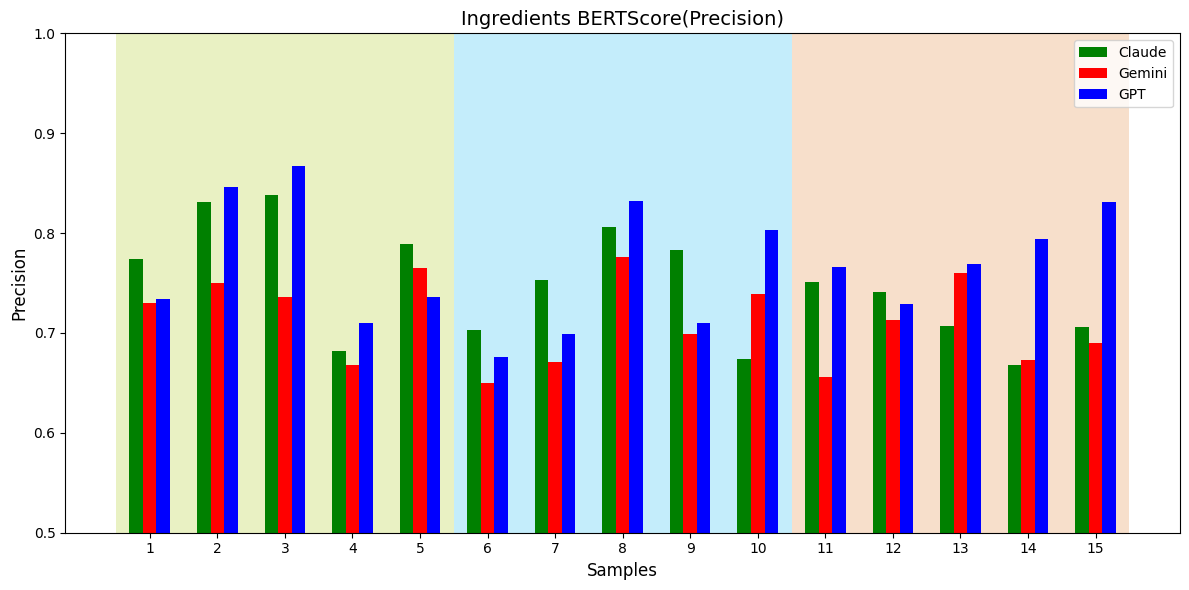

In [16]:
import matplotlib.pyplot as plt
x = list(range(1, 16))
x2 = [i + 0.2 for i in x]
x3 = [i - 0.2 for i in x]

fig, ax = plt.subplots(figsize=(12, 6))

color_map = {0: "#e9f1c3", 5: "#c4edfb", 10: "#f7dfcb"}

for i in range(0, 15, 5):
    ax.axvspan(i + 0.5, i + 5.5, facecolor=color_map[i], alpha=0.99)

# 畫長條圖
claude_scores = [score[0] for score in claude_ing_bertscore]
gemini_scores = [score[0] for score in gemini_ing_bertscore]
gpt_scores = [score[0] for score in gpt_ing_bertscore]

# 畫長條圖
ax.bar(x3, claude_scores, color='g', width=0.2, label='Claude')
ax.bar(x, gemini_scores, color='r', width=0.2, label='Gemini')
ax.bar(x2, gpt_scores, color='b', width=0.2, label='GPT')

# 加上 legend、標題與格式調整
ax.legend()
ax.set_xticks(range(1, 16))
ax.set_xlabel('Samples', fontsize=12)
ax.set_ylabel('Precision', fontsize=12)
ax.set_title('Ingredients BERTScore(Precision)', fontsize=14)
ax.set_ylim(0.5, 1.0)

plt.tight_layout()
plt.savefig('ing_bertscore_precision.png')

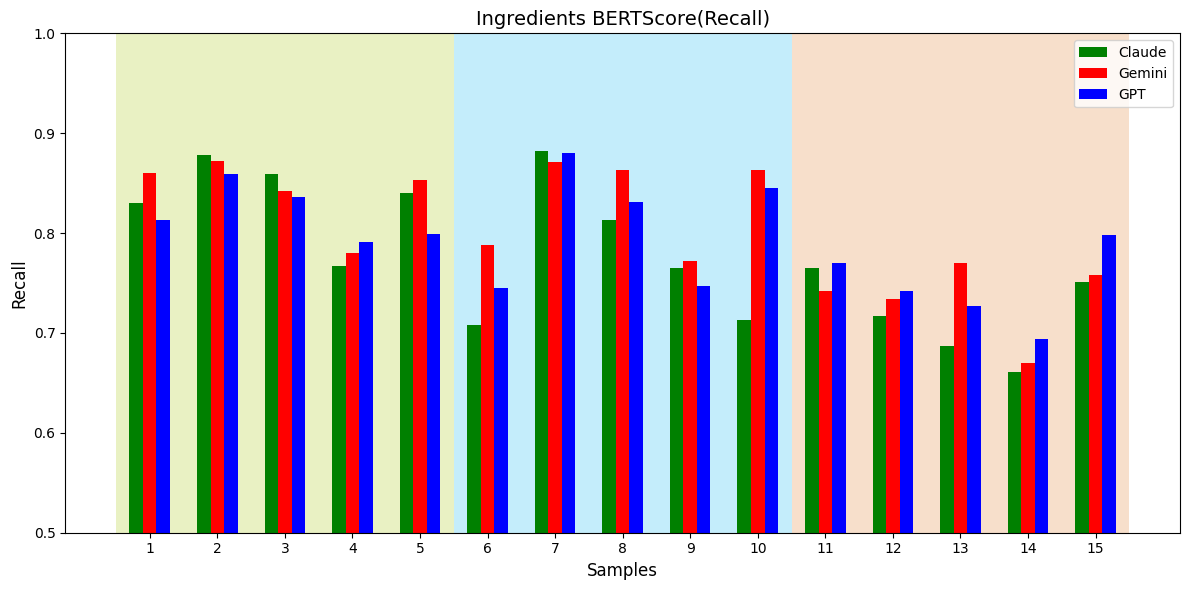

In [17]:
import matplotlib.pyplot as plt
x = list(range(1, 16))
x2 = [i + 0.2 for i in x]
x3 = [i - 0.2 for i in x]

fig, ax = plt.subplots(figsize=(12, 6))

color_map = {0: "#e9f1c3", 5: "#c4edfb", 10: "#f7dfcb"}

for i in range(0, 15, 5):
    ax.axvspan(i + 0.5, i + 5.5, facecolor=color_map[i], alpha=0.99)

# 畫長條圖
claude_scores = [score[1] for score in claude_ing_bertscore]
gemini_scores = [score[1] for score in gemini_ing_bertscore]
gpt_scores = [score[1] for score in gpt_ing_bertscore]

# 畫長條圖
ax.bar(x3, claude_scores, color='g', width=0.2, label='Claude')
ax.bar(x, gemini_scores, color='r', width=0.2, label='Gemini')
ax.bar(x2, gpt_scores, color='b', width=0.2, label='GPT')

# 加上 legend、標題與格式調整
ax.legend()
ax.set_xticks(range(1, 16))
ax.set_xlabel('Samples', fontsize=12)
ax.set_ylabel('Recall', fontsize=12)
ax.set_title('Ingredients BERTScore(Recall)', fontsize=14)
ax.set_ylim(0.5, 1.0)

plt.tight_layout()
plt.savefig('ing_bertscore_recall.png')

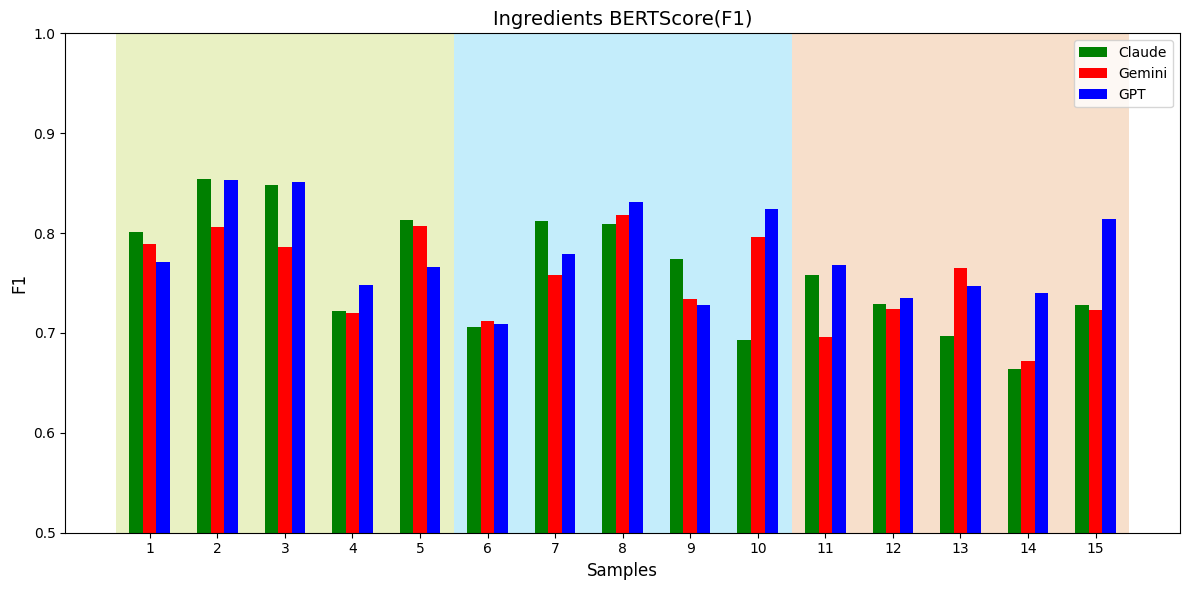

In [18]:
import matplotlib.pyplot as plt
x = list(range(1, 16))
x2 = [i + 0.2 for i in x]
x3 = [i - 0.2 for i in x]

fig, ax = plt.subplots(figsize=(12, 6))

color_map = {0: "#e9f1c3", 5: "#c4edfb", 10: "#f7dfcb"}

for i in range(0, 15, 5):
    ax.axvspan(i + 0.5, i + 5.5, facecolor=color_map[i], alpha=0.99)

# 畫長條圖
claude_scores = [score[2] for score in claude_ing_bertscore]
gemini_scores = [score[2] for score in gemini_ing_bertscore]
gpt_scores = [score[2] for score in gpt_ing_bertscore]

# 畫長條圖
ax.bar(x3, claude_scores, color='g', width=0.2, label='Claude')
ax.bar(x, gemini_scores, color='r', width=0.2, label='Gemini')
ax.bar(x2, gpt_scores, color='b', width=0.2, label='GPT')

# 加上 legend、標題與格式調整
ax.legend()
ax.set_xticks(range(1, 16))
ax.set_xlabel('Samples', fontsize=12)
ax.set_ylabel('F1', fontsize=12)
ax.set_title('Ingredients BERTScore(F1)', fontsize=14)
ax.set_ylim(0.5, 1.0)

plt.tight_layout()
plt.savefig('ing_bertscore_F1.png')

## Cooking Instructions

### BERTscore

In [12]:
from bert_score import score

gpt_instrc_bertscore = []
gemini_instrc_bertscore = []
claude_instrc_bertscore = []

def bertscore_for_instrc_sentence(gt_instrc_sentence, model_instrc_sentence):
    
    # 使用bert_score库计算分数
    candidate_sentences = [model_instrc_sentence] 
    reference_sentences = [gt_instrc_sentence] 
    
    # 使用中文BERT模型计算BERTScore
    P, R, F1 = score(candidate_sentences, reference_sentences, lang='zh', verbose=False)
    
    return P.item(), R.item(), F1.item()

def get_instrc_bertscore(gt_instrc_sentence_dic, model_instrc_sentence_dic):
    instrc_bertscore = []
    for gt_id, model_id in zip(gt_instrc_sentence_dic, model_instrc_sentence_dic):
        sentence1 = gt_instrc_sentence_dic[gt_id]
        sentence2 = model_instrc_sentence_dic[model_id]
        instrc_bertscore.append(bertscore_for_instrc_sentence(sentence1, sentence2))
    return instrc_bertscore

gpt_instrc_bertscore = get_instrc_bertscore(gt_instrc_sentence_dic, gpt_instrc_sentence_dic)
gemini_instrc_bertscore = get_instrc_bertscore(gt_instrc_sentence_dic, gemini_instrc_sentence_dic)
claude_instrc_bertscore = get_instrc_bertscore(gt_instrc_sentence_dic, claude_instrc_sentence_dic)

for i in range(len(gpt_instrc_bertscore)):
    # print(f'樣本 {i+1}:')
    # print(f'  GPT    - P: {gpt_instrc_bertscore[i][0]:.4f}, R: {gpt_instrc_bertscore[i][1]:.4f}, F1: {gpt_instrc_bertscore[i][2]:.4f}')
    # print(f'  Gemini - P: {gemini_instrc_bertscore[i][0]:.4f}, R: {gemini_instrc_bertscore[i][1]:.4f}, F1: {gemini_instrc_bertscore[i][2]:.4f}')
    # print(f'  Claude - P: {claude_instrc_bertscore[i][0]:.4f}, R: {claude_instrc_bertscore[i][1]:.4f}, F1: {claude_instrc_bertscore[i][2]:.4f}')
    # print()
    print(f'{gpt_instrc_bertscore[i][2]:.4f}')
    print(f'{gemini_instrc_bertscore[i][2]:.4f}')
    print(f'{claude_instrc_bertscore[i][2]:.4f}')
    

0.7593
0.7443
0.7628
0.7590
0.7433
0.7736
0.7108
0.7041
0.7386
0.6912
0.6837
0.6708
0.7321
0.7339
0.7442
0.7690
0.7685
0.7603
0.7498
0.7499
0.7236
0.7790
0.7601
0.7799
0.7523
0.7669
0.7299
0.7232
0.7330
0.6793
0.7228
0.6994
0.7252
0.7786
0.7638
0.7623
0.7113
0.7116
0.6672
0.6617
0.6638
0.6340
0.7880
0.7378
0.7391


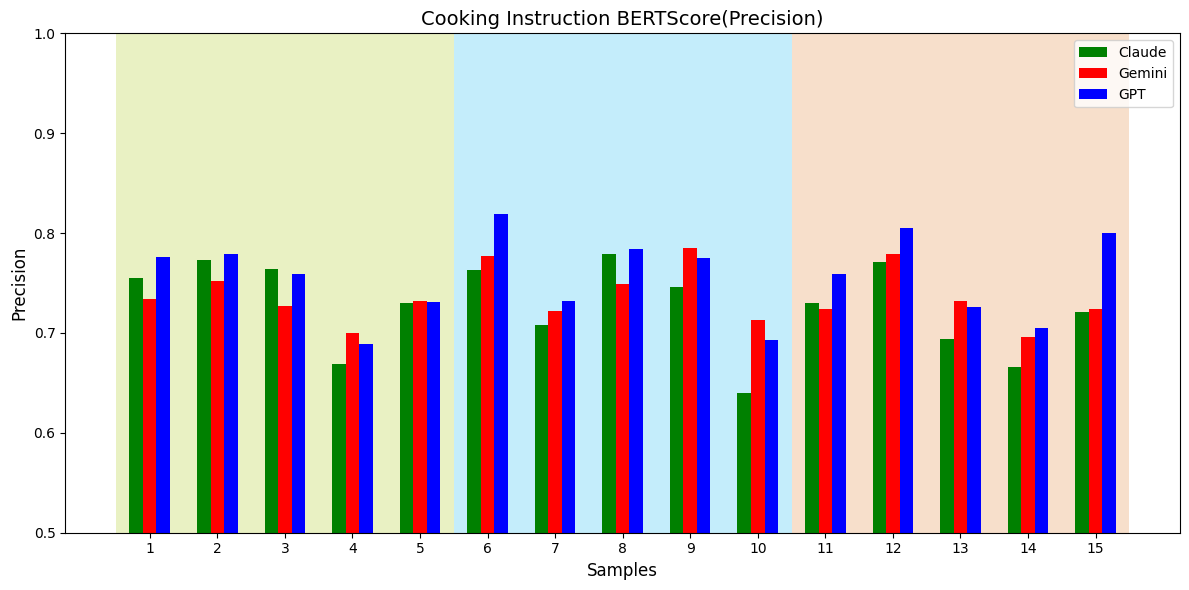

In [ ]:
import matplotlib.pyplot as plt
x = list(range(1, 16))
x2 = [i + 0.2 for i in x]
x3 = [i - 0.2 for i in x]

fig, ax = plt.subplots(figsize=(12, 6))

color_map = {0: "#e9f1c3", 5: "#c4edfb", 10: "#f7dfcb"}

for i in range(0, 15, 5):
    ax.axvspan(i + 0.5, i + 5.5, facecolor=color_map[i], alpha=0.99)

# 畫長條圖
claude_scores = [score[0] for score in claude_instrc_bertscore]
gemini_scores = [score[0] for score in gemini_instrc_bertscore]
gpt_scores = [score[0] for score in gpt_instrc_bertscore]

# 畫長條圖
ax.bar(x3, claude_scores, color='g', width=0.2, label='Claude')
ax.bar(x, gemini_scores, color='r', width=0.2, label='Gemini')
ax.bar(x2, gpt_scores, color='b', width=0.2, label='GPT')

# 加上 legend、標題與格式調整
ax.legend()
ax.set_xticks(range(1, 16))
ax.set_xlabel('Samples', fontsize=12)
ax.set_ylabel('Precision', fontsize=12)
ax.set_title('Cooking Instruction BERTScore(Precision)', fontsize=14)
ax.set_ylim(0.5, 1.0)

plt.tight_layout()
plt.savefig('instr_bertscore_precision.png')

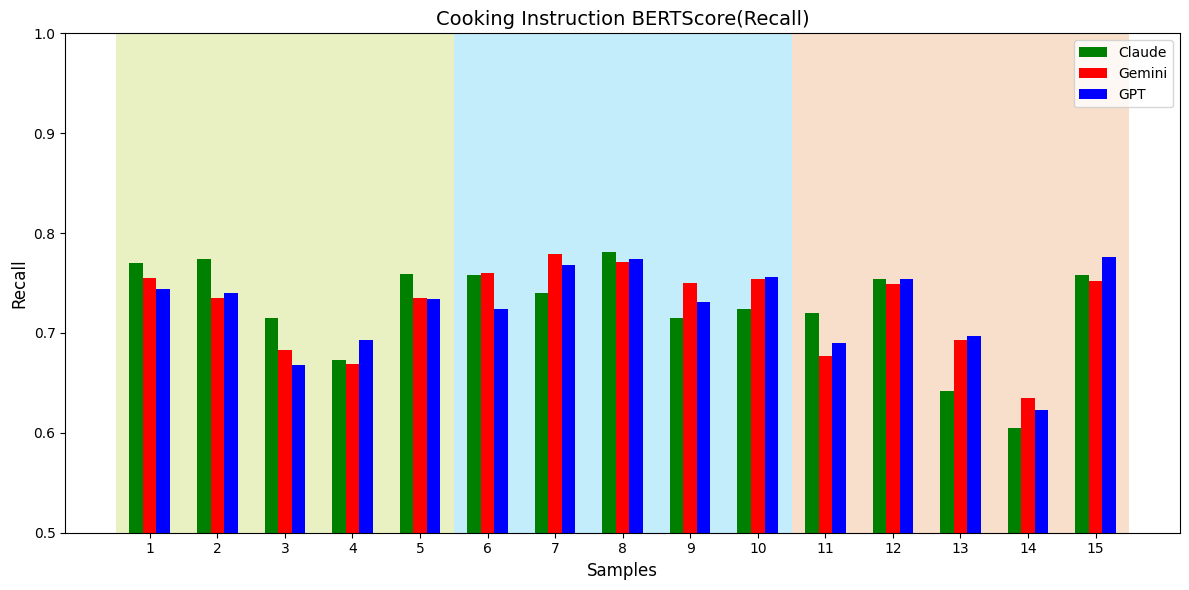

In [ ]:
import matplotlib.pyplot as plt
x = list(range(1, 16))
x2 = [i + 0.2 for i in x]
x3 = [i - 0.2 for i in x]

fig, ax = plt.subplots(figsize=(12, 6))

color_map = {0: "#e9f1c3", 5: "#c4edfb", 10: "#f7dfcb"}

for i in range(0, 15, 5):
    ax.axvspan(i + 0.5, i + 5.5, facecolor=color_map[i], alpha=0.99)

# 畫長條圖
claude_scores = [score[1] for score in claude_instrc_bertscore]
gemini_scores = [score[1] for score in gemini_instrc_bertscore]
gpt_scores = [score[1] for score in gpt_instrc_bertscore]

# 畫長條圖
ax.bar(x3, claude_scores, color='g', width=0.2, label='Claude')
ax.bar(x, gemini_scores, color='r', width=0.2, label='Gemini')
ax.bar(x2, gpt_scores, color='b', width=0.2, label='GPT')

# 加上 legend、標題與格式調整
ax.legend()
ax.set_xticks(range(1, 16))
ax.set_xlabel('Samples', fontsize=12)
ax.set_ylabel('Recall', fontsize=12)
ax.set_title('Cooking Instruction BERTScore(Recall)', fontsize=14)
ax.set_ylim(0.5, 1.0)

plt.tight_layout()
plt.savefig('instr_bertscore_recall.png')

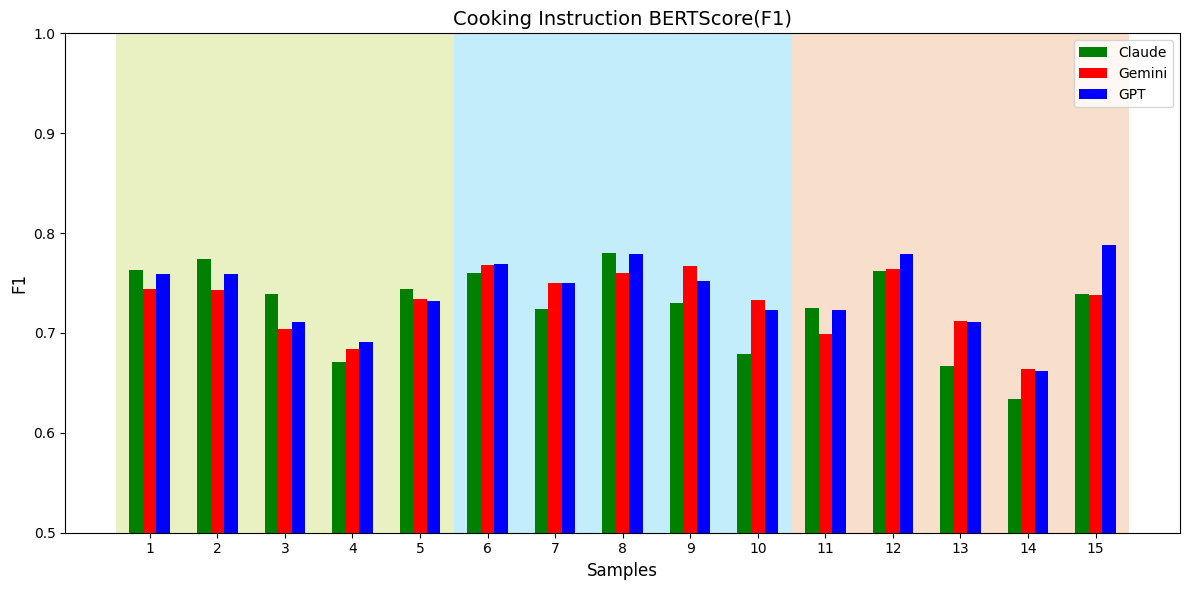

In [ ]:
import matplotlib.pyplot as plt
x = list(range(1, 16))
x2 = [i + 0.2 for i in x]
x3 = [i - 0.2 for i in x]

fig, ax = plt.subplots(figsize=(12, 6))

color_map = {0: "#e9f1c3", 5: "#c4edfb", 10: "#f7dfcb"}

for i in range(0, 15, 5):
    ax.axvspan(i + 0.5, i + 5.5, facecolor=color_map[i], alpha=0.99)

# 畫長條圖
claude_scores = [score[2] for score in claude_instrc_bertscore]
gemini_scores = [score[2] for score in gemini_instrc_bertscore]
gpt_scores = [score[2] for score in gpt_instrc_bertscore]

# 畫長條圖
ax.bar(x3, claude_scores, color='g', width=0.2, label='Claude')
ax.bar(x, gemini_scores, color='r', width=0.2, label='Gemini')
ax.bar(x2, gpt_scores, color='b', width=0.2, label='GPT')

# 加上 legend、標題與格式調整
ax.legend()
ax.set_xticks(range(1, 16))
ax.set_xlabel('Samples', fontsize=12)
ax.set_ylabel('F1', fontsize=12)
ax.set_title('Cooking Instruction BERTScore(F1)', fontsize=14)
ax.set_ylim(0.5, 1.0)

plt.tight_layout()
plt.savefig('instr_bertscore_F1.png')